In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src_img = cv2.imread("F:/vinAI/water-level/data/ruler.jpg")

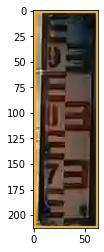

In [3]:
plt.imshow(src_img, cmap='gray')
plt.show()

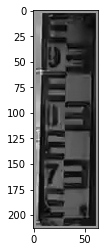

In [4]:
gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
# gray = cv2.convertScaleAbs(src_img)
cv2.imwrite("F:/vinAI/water-level/data/ruler_gray.jpg",gray)
plt.imshow(gray,cmap='gray')
plt.show()

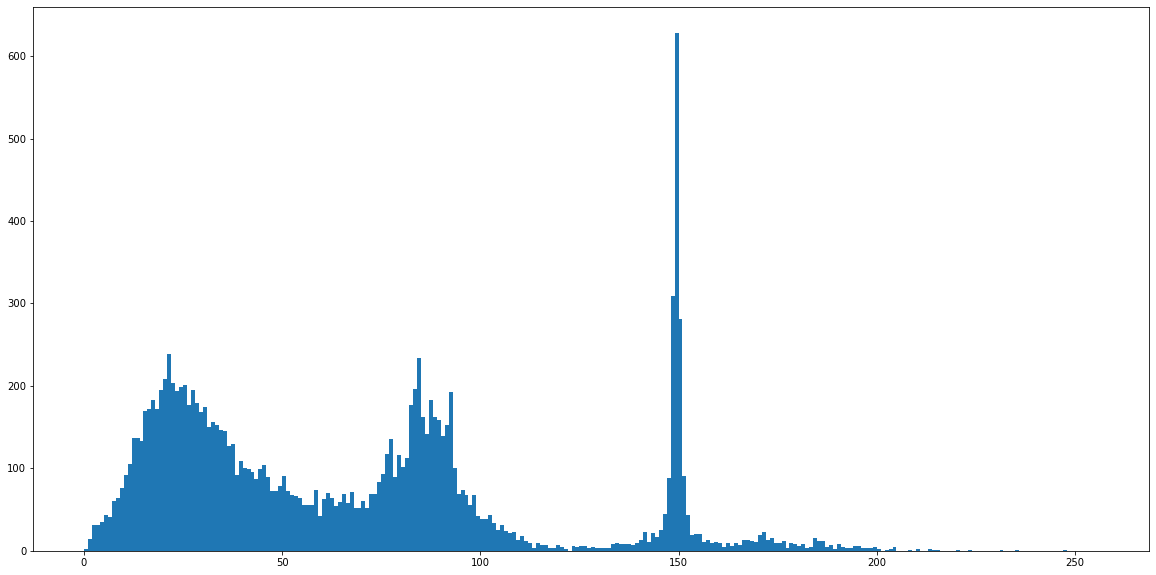

In [24]:
f,ax = plt.subplots(figsize=(20,10))
plt.hist(gray.ravel(),256,[0,256]); 
plt.show()

(213, 63)


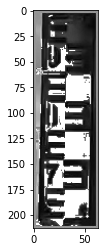

In [72]:
shape = gray.shape
print(shape)
enhan = gray.copy()
for i in range(0,shape[0]):
    for j in range(0, shape[1]):
#         print(gray[i][j])
        if enhan[i][j]>=75 and enhan[i][j]<=110:
            enhan[i][j]=255
#         elif enhan[i][j]>=30 and enhan[i][j]<=50:
#             enhan[i][j]=255
plt.imshow(enhan,cmap='gray')

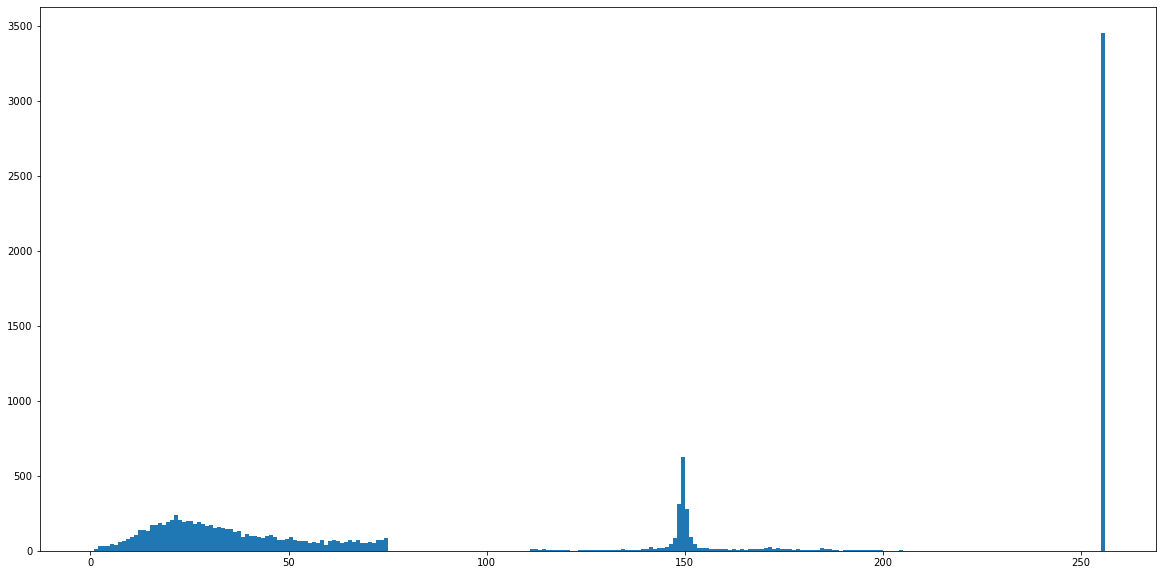

In [68]:
f,ax = plt.subplots(figsize=(20,10))
plt.hist(enhan.ravel(),256,[0,256]);
plt.show()

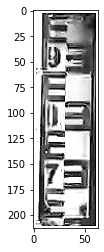

In [5]:
sharpeningKernel = np.array(([0, -1, 0],[-1, 7, -1],[0, -1, 0]), dtype="int")
sharpen = cv2.filter2D(gray, -1, sharpeningKernel)
blur_sharpen = cv2.GaussianBlur(sharpen,(3,3),0)
# cv2.imwrite("F:/vinAI/water-level/data/sharpening.jpg",output)
plt.imshow(sharpen,cmap='gray')

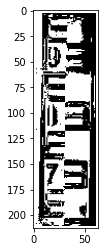

In [6]:
thresh = 125
binary = cv2.threshold(sharpen, thresh, 255, cv2.THRESH_BINARY)[1]
plt.imshow(binary,cmap='gray')


In [8]:
def canny_edge_detection(img, blur_ksize, threshold1, threshold2):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(img,(blur_ksize,blur_ksize),0)
    img_canny = cv2.Canny(img_gaussian,threshold1,threshold2)
    return img_canny

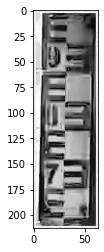

In [9]:
equal = cv2.equalizeHist(gray)
plt.imshow(equal,cmap='gray')

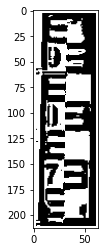

In [10]:
binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,35,1)
plt.imshow(binary,cmap='gray')

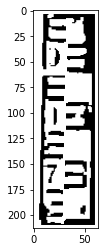

In [22]:
binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,35,1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilate = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel)
diff = cv2.absdiff(dilate, thresh)
plt.imshow(diff,cmap='gray')

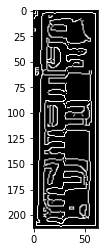

In [73]:
# img_blur = cv2.medianBlur(output,5)
binary = cv2.adaptiveThreshold(equal,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,35,1)

img_canny = canny_edge_detection(binary, 5, 1, 200)
cv2.imwrite("F:/vinAI/water-level/data/ruler_canny.jpg",img_canny)

plt.imshow(img_canny,cmap='gray')
plt.show()

In [13]:
def white_pix_in_row(img, width):
    num_of_white=0
    num_of_white_list=[]
    shape = img.shape
    for i in range(width, shape[0]+1, width):
        num_of_white = 0
        for j in range(i-width, i):
            for k in range(0,shape[1]):
                if img_canny[j][k]==255:
                    num_of_white+=1
        num_of_white_list.append(num_of_white)
    return num_of_white_list

In [14]:
print(white_pix_in_row(img_canny,4))

[52, 46, 46, 32, 37, 18, 35, 41, 39, 56, 32, 58, 54, 49, 48, 48, 38, 19, 34, 36, 16, 39, 66, 59, 27, 40, 60, 36, 50, 62, 40, 18, 38, 38, 23, 40, 56, 50, 43, 45, 48, 31, 53, 50, 27, 22, 38, 47, 35, 49, 73, 42, 62]


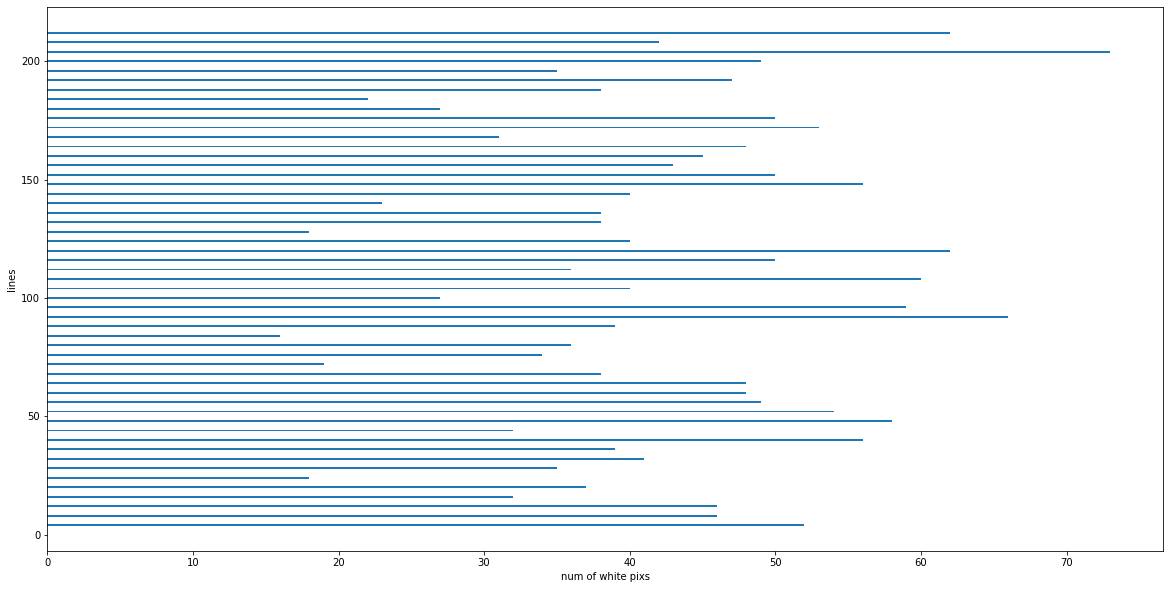

In [15]:
lines = [*range(4,213,4)]
freq = white_pix_in_row(img_canny,4)
f, ax = plt.subplots(figsize=(20,10))
plt.barh(lines,freq)
plt.ylabel('lines')
plt.xlabel('num of white pixs')
plt.show()

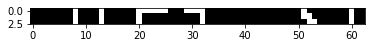

In [16]:
check_line_img = img_canny[15:18, 0:63]
plt.imshow(check_line_img,cmap='gray')

In [80]:
width, height = gray.shape[1], gray.shape[0]
width

63

In [17]:
j=0
for i in freq:
    if i>=30:
        check_line_img = img_canny[j:j+4, 0:63]
        cv2.imwrite("F:/vinAI/water-level/data/check_line_img/check_line_img"+str(j)+".jpg",check_line_img)
        j+=4
    j+=4

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-q0nmoxxv\opencv\modules\imgcodecs\src\loadsave.cpp:738: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [ ]:
count=0
for i in freq:
    if i>=30:
        count+=1
print(count)

In [ ]:
contours, hierarchy = cv2.findContours(img_canny,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
# print(contours)
con = img_canny.copy()
cv2.drawContours(con, contours, -1, (255, 255, 255), 2) 
plt.imshow(con)

In [ ]:
def FLD(image):
    # Create default Fast Line Detector class
    fld = cv2.ximgproc.createFastLineDetector(_canny_aperture_size=3, _do_merge = False)
    # Get line vectors from the image
    lines = fld.detect(image)
    # Draw lines on the image
#     line_on_image = fld.drawSegments(image, lines)
    # Plot
    return lines

In [ ]:
equal = cv2.equalizeHist(gray)

lines= FLD(gray)
img_hor_gray = gray.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
        if (y2-y1)/(x2-x1)<=0.2 and (y2-y1)/(x2-x1)>=-0.2:
            cv2.line(img_hor_gray,(x1,y1),(x2,y2),(255,255,255),1)
cv2.imwrite("F:/vinAI/water-level/data/ruler_FLD.jpg",img_hor_gray)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(blur_sharpen,cmap='gray')
axarr[1].imshow(img_hor_gray,cmap='gray')

In [ ]:
img_hor = equal.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
        if (y2-y1)/(x2-x1)<=0.2 and (y2-y1)/(x2-x1)>=-0.2:
            cv2.line(img_hor,(x1,y1),(x2,y2),(255,255,255),2)
plt.imshow(img_hor,cmap='gray')
# cv2.imwrite("",img_hor)

In [ ]:
plt.imshow(FLD(equal))

In [ ]:
lines = cv2.HoughLinesP(img_canny,rho=1,theta=np.pi/180,threshold=2,minLineLength=1,maxLineGap=3)
horizontal_lines = np.empty((0,4)) 
img_horizontal = src_img.copy()
# img_vertical = img.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
        if (y2-y1)/(x2-x1)<=0.05 and (y2-y1)/(x2-x1)>=-0.05:
            cv2.line(img_horizontal,(x1,y1),(x2,y2),(255,255,255),1)
            horizontal_lines = np.append(horizontal_lines,[[x1,y1,x2,y2]],axis=0)
print(horizontal_lines.size)
plt.imshow(img_horizontal,cmap='gray')
plt.show()